In [1]:
import numpy as np
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

np.set_printoptions(precision=3)

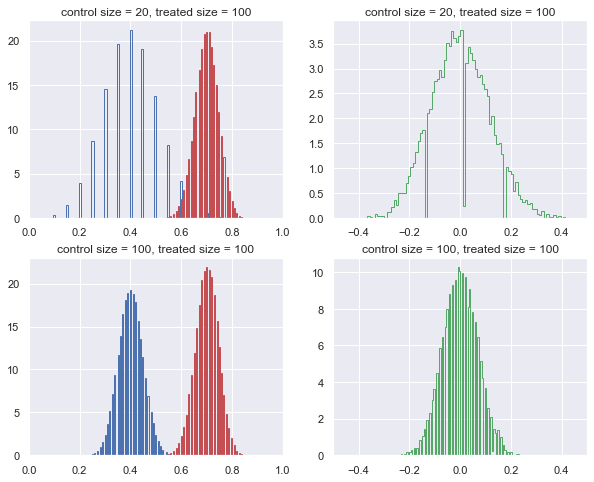

In [8]:
#Let's assume that the probability of recovery in a control group 0.4.
#let's assume that the probability of recovery in the treated group is 0.7.

#Let's take a sample of sizes 10 and plot the means.
#First the control
repeats=100000
outcomes=np.array([0, 1])
control_sample_size=20
treated_sample_size=100
control_p=[0.6, 0.4]
treated_p=[0.3, 0.7]

control_samples=np.random.choice(outcomes,size=(repeats,control_sample_size),p=control_p)
control_means=np.mean(control_samples,axis=1)

treated_samples=np.random.choice(outcomes,size=(repeats,treated_sample_size),p=treated_p)
treated_means=np.mean(treated_samples,axis=1)
#control_means
fig, ax=plt.subplots(2,2, figsize=(10,8))

ax[0,0].hist(control_means, bins=100, density=True, color='b',histtype='step')
ax[0,0].hist(treated_means, bins=100, density=True, color='r',histtype='step')

#Now do the Fisher permutations 

all_together=np.concatenate((treated_samples, control_samples), axis=1)

number_of_splits=10000
differences=np.zeros(number_of_splits)
all_copy=all_together
for i in range(number_of_splits):
    np.random.shuffle(all_copy[i,:]) #Shuffle it
    fake_treated=all_copy[i,:treated_sample_size]
    fake_control=all_copy[i,treated_sample_size:]
    differences[i]=fake_treated.mean()-fake_control.mean()

    
ax[0,1].hist(differences, bins=100, density=True, color='g',histtype='step')
ax[0,0].title.set_text('control size = 20, treated size = 100')
ax[0,1].title.set_text('control size = 20, treated size = 100')
    
repeats=100000
outcomes=np.array([0, 1])
control_sample_size=100
treated_sample_size=100
control_p=[0.6, 0.4]
treated_p=[0.3, 0.7]

control_samples=np.random.choice(outcomes,size=(repeats,control_sample_size),p=control_p)
control_means=np.mean(control_samples,axis=1)

treated_samples=np.random.choice(outcomes,size=(repeats,treated_sample_size),p=treated_p)
treated_means=np.mean(treated_samples,axis=1)
#control_means
#fig, ax=plt.subplots(2,2, figsize=(10,5))

ax[1,0].hist(control_means, bins=100, density=True, color='b',histtype='step')
ax[1,0].hist(treated_means, bins=100, density=True, color='r',histtype='step')

#Now do the Fisher permutations 

all_together=np.concatenate((treated_samples, control_samples), axis=1)

number_of_splits=10000
differences=np.zeros(number_of_splits)
all_copy=all_together
for i in range(number_of_splits):
    np.random.shuffle(all_copy[i,:]) #Shuffle it
    fake_treated=all_copy[i,:treated_sample_size]
    fake_control=all_copy[i,treated_sample_size:]
    differences[i]=fake_treated.mean()-fake_control.mean()

    
ax[1,1].hist(differences, bins=100, density=True, color='g',histtype='step')
ax[1,0].title.set_text('control size = 100, treated size = 100')
ax[1,1].title.set_text('control size = 100, treated size = 100')

ax[0,0].set_xlim([0,1])
ax[1,0].set_xlim([0,1])
ax[0,1].set_xlim([-0.5,0.5])
ax[1,1].set_xlim([-0.5,0.5])

plt.show()

Good read:
    
https://www.markhw.com/blog/control-size